<a href="https://colab.research.google.com/github/Shruti1102000/German-to-English-Machine-Translation-model/blob/main/Machine_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **German English Translation using LSTM**

Data Source : http://www.manythings.org/anki/

Parallel sentences : 50000

# **Importing Necessory Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# **Loading Data file(s)**

In [ ]:
# opening the input files
file = open('/content/deu.txt', mode='r', encoding='utf-8')
        
# reading all text
text = file.read()

# closing the file
file.close()

# **Spliting Text to Sentences**

In [ ]:
# split using '\n' or newline character
sentences = text.strip().split('\n')
    
# split between english and german
german_english = [i.split('\t')[0:2] for i in sentences]

# list to numpy array
german_english = np.array(german_english)

## Parallel data

In [ ]:
# actual file has over 1 lakh sentences but we will only 50000 for demonstration
german_english = german_english[:50000,:]

# **Data Cleaning**

In [ ]:
# function to clean punctuations from text
def clean(sentence):
  punc = '''!()-[]{};:'", <>./?@#$%^&*_~'''
  for i in range(len(sentence)):  
        if sentence[i] in punc:  
            sentence =sentence.replace(sentence[i], " ")  
  return sentence

for i in range(len(german_english)):
  german_english[i,0]=clean(german_english[i,0])
  german_english[i,1]=clean(german_english[i,1])

# **Data Transform**

In [ ]:
# transforming all uppercase character to lowercase to remove case sensitivity
for i in range(len(german_english)):
    german_english[i,0] = german_english[i,0].lower()
    german_english[i,1] = german_english[i,1].lower()

# **Tokenization**

In [ ]:
# for English side data
# initialising tokenizer
eng_tokenizer = Tokenizer()
# fitting data
eng_tokenizer.fit_on_texts(german_english[:,0])
# getting vocab size
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

# for German side data
# initialising tokenizer
german_tokenizer = Tokenizer()
# fitting data
german_tokenizer.fit_on_texts(german_english[:,1])
# getting vocab size
german_vocab_size = len(german_tokenizer.word_index) + 1

german_length = 8
print('german Vocabulary Size: %d' % german_vocab_size)

English Vocabulary Size: 4241
german Vocabulary Size: 6771


# **Splitting data into Train and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# split data into train and test set in 80:20 ratio
train, test = train_test_split(german_english, test_size=0.2, random_state = 12)

# **Tokens to Sequences**

In [ ]:
# function to encode text into numbers
def encode_sequences( tokenizer , length , lines):

  seq = tokenizer.texts_to_sequences(lines)
  
  # pad sequences with 0 values to make all sequences of equal length
  seq = pad_sequences(seq, maxlen=length, padding='post')

  return seq

In [ ]:
# prepare training data
# german part
trainX = encode_sequences(german_tokenizer, german_length, train[:, 1])

# english part
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
# german part
testX = encode_sequences(german_tokenizer, german_length, test[:, 1])

# english part
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

# **Modelling**

## **Defining Model** 

In [ ]:
# model initialisation
model = Sequential()

# adding embedding layer
model.add(Embedding(german_vocab_size, 256, input_length=german_length, mask_zero=True))

# adding a LSTM layer
model.add(LSTM(256))

model.add(RepeatVector(eng_length))

# adding a LSTM layer
model.add(LSTM(256, return_sequences=True))

# adding a dense layer to predict words in english
model.add(Dense(eng_vocab_size, activation='softmax'))

# view model details
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 256)            1733376   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 8, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 256)            525312    
_________________________________________________________________
dense (Dense)                (None, 8, 4241)           1089937   
Total params: 3,873,937
Trainable params: 3,873,937
Non-trainable params: 0
_________________________________________________________________


## **Compiling model**

In [ ]:
# using adam optimizer with sparse categorical cross entropy as loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

## **Training model**

In [ ]:
# path to save model
filename = 'drive/My Drive/en-es-model'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=20, batch_size=100, validation_split = 0.2,callbacks=[checkpoint], verbose=1)

Epoch 1/20
167/167 [==============================] - 16s 34ms/step - loss: 4.6076 - val_loss: 2.7048

Epoch 00001: val_loss improved from inf to 2.70475, saving model to drive/My Drive/en-es-model


Epoch 2/20
167/167 [==============================] - 4s 25ms/step - loss: 2.6360 - val_loss: 2.5470

Epoch 00002: val_loss improved from 2.70475 to 2.54700, saving model to drive/My Drive/en-es-model


Epoch 3/20
167/167 [==============================] - 4s 25ms/step - loss: 2.4771 - val_loss: 2.4702

Epoch 00003: val_loss improved from 2.54700 to 2.47020, saving model to drive/My Drive/en-es-model


Epoch 4/20
167/167 [==============================] - 4s 25ms/step - loss: 2.3743 - val_loss: 2.3741

Epoch 00004: val_loss improved from 2.47020 to 2.37411, saving model to drive/My Drive/en-es-model


Epoch 5/20
167/167 [==============================] - 4s 25ms/step - loss: 2.2704 - val_loss: 2.2837

Epoch 00005: val_loss improved from 2.37411 to 2.28371, saving model to drive/My Drive/en-es-model


Epoch 6/20
167/167 [==============================] - 4s 25ms/step - loss: 2.1712 - val_loss: 2.2130

Epoch 00006: val_loss improved from 2.28371 to 2.21301, saving model to drive/My Drive/en-es-model


Epoch 7/20
167/167 [==============================] - 4s 25ms/step - loss: 2.0815 - val_loss: 2.1267

Epoch 00007: val_loss improved from 2.21301 to 2.12669, saving model to drive/My Drive/en-es-model


Epoch 8/20
167/167 [==============================] - 4s 25ms/step - loss: 1.9859 - val_loss: 2.0440

Epoch 00008: val_loss improved from 2.12669 to 2.04401, saving model to drive/My Drive/en-es-model


Epoch 9/20
167/167 [==============================] - 4s 25ms/step - loss: 1.8767 - val_loss: 1.9664

Epoch 00009: val_loss improved from 2.04401 to 1.96645, saving model to drive/My Drive/en-es-model


Epoch 10/20
167/167 [==============================] - 4s 25ms/step - loss: 1.7722 - val_loss: 1.8930

Epoch 00010: val_loss improved from 1.96645 to 1.89299, saving model to drive/My Drive/en-es-model


Epoch 11/20
167/167 [==============================] - 4s 24ms/step - loss: 1.6841 - val_loss: 1.8242

Epoch 00011: val_loss improved from 1.89299 to 1.82419, saving model to drive/My Drive/en-es-model


Epoch 12/20
167/167 [==============================] - 5s 27ms/step - loss: 1.5875 - val_loss: 1.7665

Epoch 00012: val_loss improved from 1.82419 to 1.76651, saving model to drive/My Drive/en-es-model


Epoch 13/20
167/167 [==============================] - 4s 27ms/step - loss: 1.5075 - val_loss: 1.7146

Epoch 00013: val_loss improved from 1.76651 to 1.71459, saving model to drive/My Drive/en-es-model


Epoch 14/20
167/167 [==============================] - 4s 27ms/step - loss: 1.4352 - val_loss: 1.6695

Epoch 00014: val_loss improved from 1.71459 to 1.66953, saving model to drive/My Drive/en-es-model


Epoch 15/20
167/167 [==============================] - 4s 26ms/step - loss: 1.3598 - val_loss: 1.6243

Epoch 00015: val_loss improved from 1.66953 to 1.62427, saving model to drive/My Drive/en-es-model


Epoch 16/20
167/167 [==============================] - 4s 25ms/step - loss: 1.2898 - val_loss: 1.5827

Epoch 00016: val_loss improved from 1.62427 to 1.58272, saving model to drive/My Drive/en-es-model


Epoch 17/20
167/167 [==============================] - 4s 25ms/step - loss: 1.2188 - val_loss: 1.5349

Epoch 00017: val_loss improved from 1.58272 to 1.53487, saving model to drive/My Drive/en-es-model


Epoch 18/20
167/167 [==============================] - 4s 25ms/step - loss: 1.1468 - val_loss: 1.4957

Epoch 00018: val_loss improved from 1.53487 to 1.49568, saving model to drive/My Drive/en-es-model


Epoch 19/20
167/167 [==============================] - 4s 25ms/step - loss: 1.0693 - val_loss: 1.4601

Epoch 00019: val_loss improved from 1.49568 to 1.46007, saving model to drive/My Drive/en-es-model


Epoch 20/20
167/167 [==============================] - 4s 25ms/step - loss: 1.0080 - val_loss: 1.4295

Epoch 00020: val_loss improved from 1.46007 to 1.42949, saving model to drive/My Drive/en-es-model


## **Training performance**

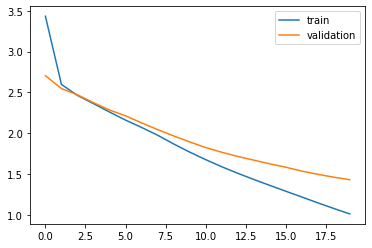

In [ ]:
# viewing model training progress 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

# **Prediction on Test data**

In [ ]:
# load trained model
model = load_model('drive/My Drive/en-es-model')

# list to store predictions
preds_list=[]

# predicting for 500 test sentences
for i in range(500):
  # predict function return the probabilities for target vobabularies
  # argmax return the index having the maximum value
  preds_list.append(np.argmax(model.predict(testX[i]), axis=-1))

## **Decoding predictions**

In [ ]:
# function to map numbers to word in english language
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

In [ ]:
# to store predicted texts
preds_text = []

# to traverse predicted values
for preds in preds_list:

  # to store predicted sentence
  sentence=''

  # iterating through each sequence
  for i in preds:
        # to store words 
        temp = []
        for j in range(len(i)):
              t = get_word(i[j], eng_tokenizer)
              if j > 0:
                  if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                      temp.append('')
                  else:
                      temp.append(t)
              else:
                    if(t == None):
                            temp.append('')
                    else:
                            temp.append(t)
        # forming by combining words
        sentence=sentence+' '+str.strip(' '.join(temp))
        
  # adding predicted sentences to list
  preds_text.append(sentence)

## **Model accuracy using BLEU Score**

In [ ]:
# viewing predictions
pred_df = pd.DataFrame({'actual' : test[:500,0], 'predicted' : preds_text[:500]})
pred_df.sample(15)

,actual,predicted
365,tom passed out,tom are was i congratulations congratulations congratulations congratulations congratulations
136,tom isn t hurt,tom is tom congratulations congratulations congratulations congratulations congratulations
481,i get up at 6 30,i go it are re here is we us go congratulations
214,your dog bit me,go the tom it me a congratulations congratulations congratulations
46,tom s free,tom is take fry merry aid congratulations congratulations congratulations congratulations congratulations
376,tom is the winner,tom is it up go congratulations congratulations congratulations congratulations
188,i have brothers,i get up they congratulations congratulations congratulations congratulations congratulations
470,they re free,you are you take fry merry aid congratulations congratulations congratulations congratulations congratulations
132,i won t deny it,i forget it don t forget congratulations congratulations congratulations
49,tom got very sick,tom are was get a sleeping happy congratulations congratulations congratulations congratulations


# **Model Accuracy using BLEU Score**

In [ ]:
import nltk

BLEU = 0

for i in range(500):
  BLEU += nltk.translate.bleu_score.sentence_bleu([test[i,0]], preds_text[i])

BLEU/=500

print("BLEU Score achieved is :",BLEU*100)

BLEU Score achieved is : 28.05049373532334


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
